In [3]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Timing and accuracy results for DG, CG and WPA
<hr style="border-width:4px; border-color:coral"></hr>

In [4]:
import pandas 

In [8]:
idx = pandas.IndexSlice

# Walltime     : time TFinal (global time)
# Prep         : one time step up time
# Integration  : 
# time steps   : Number of time steps to time tfinal
# dt           : Time step size
# CFL          : CFL number
# Errors       : (1-norm, 2-norm and inf-norm) errors

ex_list = ['advection','SWE']

cols = ['walltime', 'Prep', 'Integ', 'time steps', 'dt', 'cfl','1-norm','2-norm','inf-norm']

order = [1,2,4]
elements = [8,16,32,64,128,256,512, 1024, 2048]
iterables = [ex_list, ['DG','CG','WPA'],['exact','inexact','w/lim','wout/lim'], order, elements]

index = pandas.MultiIndex.from_product(iterables,names=['example','method','integration','order','elements'])
df = pandas.DataFrame(index=index,columns=cols).sort_index()

df.loc[idx['SWE','CG',['exact','inexact']]]

walltime Prep Integ time steps   dt  \
example method integration order elements                                       
SWE     CG     exact       1     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN  NaN   
                                 64            NaN  NaN   NaN        NaN  NaN   
                                 128           NaN  NaN   NaN        NaN  NaN   
                                 256           NaN  NaN   NaN        NaN  NaN   
                                 512           NaN  NaN   NaN        NaN  NaN   
                                 1024          NaN  NaN   NaN        NaN  NaN   
                                 2048          NaN  NaN   NaN        NaN  NaN   
                           2     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN  NaN   
                                 64            NaN  NaN   NaN        NaN  NaN   
                                 128           NaN  NaN   NaN        NaN  NaN   
                                 256           NaN  NaN   NaN        NaN  NaN   
                                 512           NaN  NaN   NaN        NaN  NaN   
                                 1024          NaN  NaN   NaN        NaN  NaN   
                                 2048          NaN  NaN   NaN        NaN  NaN   
                           4     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN  NaN   
                                 64            NaN  NaN   NaN        NaN  NaN   
                                 128           NaN  NaN   NaN        NaN  NaN   
                                 256           NaN  NaN   NaN        NaN  NaN   
                                 512           NaN  NaN   NaN        NaN  NaN   
                                 1024          NaN  NaN   NaN        NaN  NaN   
                                 2048          NaN  NaN   NaN        NaN  NaN   
               inexact     1     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN  NaN   
                                 64            NaN  NaN   NaN        NaN  NaN   
                                 128           NaN  NaN   NaN        NaN  NaN   
                                 256           NaN  NaN   NaN        NaN  NaN   
                                 512           NaN  NaN   NaN        NaN  NaN   
                                 1024          NaN  NaN   NaN        NaN  NaN   
                                 2048          NaN  NaN   NaN        NaN  NaN   
                           2     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN  NaN   
                                 64            NaN  NaN   NaN        NaN  NaN   
                                 128           NaN  NaN   NaN        NaN  NaN   
                                 256           NaN  NaN   NaN        NaN  NaN   
                                 512           NaN  NaN   NaN        NaN  NaN   
                                 1024          NaN  NaN   NaN        NaN  NaN   
                                 2048          NaN  NaN   NaN        NaN  NaN   
                           4     8             NaN  NaN   NaN        NaN  NaN   
                                 16            NaN  NaN   NaN        NaN  NaN   
                                 32            NaN  NaN   NaN        NaN 

## Read in binary WPA data
<hr style="border-width:2px; border-color:black"></hr>

Read in data created during simulation.  The data is output in binary using a Numpy dynamic type `dtype`.  The data has to then be read in using the same format.  The file structure is : 

    Row 1  : nlen               Number of N values in convergence study

The following block then repeats four times for order=(1,2), limiter=(0,1)

Block :

      dtype([('order',int),('limiter',int)])   
      
      # Followed by N rows of 
      dtype([('N',int),('wall','d'), ('setup','d'),('integ','d'),('M',int),('dt','d'),('cfl','d'),
                  ('1-norm','d'),('2-norm','d'),('inf-norm','d')])
                  


In [6]:
output_file = 'WPA/wpa_adv_data.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('wall','d'), ('setup','d'),('integ','d'),('M',int),('dt','d'),('cfl','d'),
                  ('1-norm','d'),('2-norm','d'),('inf-norm','d')])  

# Create a nested data type
dt_info = dtype([('order',int),('limiter',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,nlen))])

# Read in four sets of data (orders 1,2 and limiters 0,1)
wpa_data = fromfile(fout,dtype=dt_block, count=4)
fout.close()

cols = ['walltime','Prep','Integ','time steps','dt', 'cfl', '1-norm','2-norm','inf-norm']

# Store data in DataFrame
for k in range(4):     # order=(1,2) x lim=(0,1)
    order = wpa_data[k]['info']['order']
    lim = wpa_data[k]['info']['limiter']
    if lim == 0:        
        limidx = 'wout/lim'
    else:
        limidx = 'w/lim'
    
    for d in wpa_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['advection','WPA',limidx,order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'walltime' : "{:.4e}".format, 
        'Prep' : "{:.2e}".format,
        "dt" : "{:.4e}", 
        'Integ' : "{:.4e}".format,
        'cfl' : "{:.2f}".format, 
        '1-norm' : '{:.4e}'.format,
        '2-norm' : '{:.4e}'.format,
        'inf-norm' : '{:.4e}'.format}
        
df_wpa = df.loc[idx['advection','WPA',['w/lim','wout/lim'],1:2],:]
df_wpa.style.format(fstr)

## Read in binary CG/DG data
<hr style="border-width:2px; border-color:black"></hr>

Read in data created during simulation.  The data is output in binary using a Numpy dynamic type `dtype`.  The data has to then be read in using the same format.  The file structure is : 

    Row 1  : nlen               Number of N values in convergence study

The following block then repeats four times for order=(1,2), limiter=(0,1)

Block :

      dtype([('order',int),('limiter',int)])   
      
      # Followed by N rows of 
      dtype([('N',int),('wall','d'), ('setup','d'),('integ','d'),('M',int),('dt','d'),('cfl','d'),
                  ('1-norm','d'),('2-norm','d'),('inf-norm','d')])
                  


In [ ]:
# Read DG/CG data here

output_file = 'CGDG/CG_adv_data.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('wall','d'), ('setup','d'),('integ','d'),('M',int),('dt','d'),('cfl','d'),
                  ('1-norm','d'),('2-norm','d'),('inf-norm','d')])  

# Create a nested data type
dt_info = dtype([('order',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,nlen))])

# Read in four sets of data (orders 1,2 and limiters 0,1)
cgdgdata = fromfile(fout,dtype=dt_block, count=4)
fout.close()

cols = ['walltime','Prep','Integ','time steps','dt', 'cfl', '1-norm','2-norm','inf-norm']

# Store data in DataFrame
for k in range(4):     # order=(1,6) x exact=(0,1)
    order = cgdg_data[k]['info']['order']
    lim = cgdg_data[k]['info']
    if lim == 0:        
        limidx = 'inexact'
    else:
        limidx = 'exact'
    
    for d in wpa_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['advection','CG',limidx,order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'walltime' : "{:.4e}".format, 
        'Prep' : "{:.2e}".format,
        "dt" : "{:.4e}", 
        'Integ' : "{:.4e}".format,
        'cfl' : "{:.2f}".format, 
        '1-norm' : '{:.4e}'.format,
        '2-norm' : '{:.4e}'.format,
        'inf-norm' : '{:.4e}'.format}
        
df_cgdg = df.loc[idx['advection','CG',['exact','inexact'],1:2],:]
df_cgdg.style.format(fstr)

## Add extra columns
<hr style="border-width:2px; border-color:black"></hr>

In [ ]:
# Add a DOF column

integration = df.index.levels[2].values
orders = df.index.levels[3].values
elements = df.index.levels[4].values

for o in orders:
    # Is this right?  
    for I in integration:
        df.loc[idx['advection','DG',I,o,:],'DOF'] = (o + 1)*array(elements)
        df.loc[idx['advection','CG',I,o,:],'DOF'] = o*array(elements) + 1
    
# One degree of freedom per element
df.loc[idx['advection','WPA','w/lim',1,:],'DOF'] = elements
df.loc[idx['advection','WPA','w/lim',2,:],'DOF'] = elements

# display data frame
df.loc[idx['advection','DG','exact',:,:],:]

## Using a MultiIndex table

<hr style="border-width:4px; border-color:coral"/>

In [10]:
# Extract all of the data for one example
df.loc['advection']

walltime Prep Integ time steps   dt  cfl  \
method integration order elements                                            
CG     exact       1     8             NaN  NaN   NaN        NaN  NaN  NaN   
                         16            NaN  NaN   NaN        NaN  NaN  NaN   
                         32            NaN  NaN   NaN        NaN  NaN  NaN   
                         64            NaN  NaN   NaN        NaN  NaN  NaN   
                         128           NaN  NaN   NaN        NaN  NaN  NaN   
...                                    ...  ...   ...        ...  ...  ...   
WPA    wout/lim    4     128           NaN  NaN   NaN        NaN  NaN  NaN   
                         256           NaN  NaN   NaN        NaN  NaN  NaN   
                         512           NaN  NaN   NaN        NaN  NaN  NaN   
                         1024          NaN  NaN   NaN        NaN  NaN  NaN   
                         2048          NaN  NaN   NaN        NaN  NaN  NaN   

                                  1-norm 2-norm inf-norm  
method integration order elements                         
CG     exact       1     8           NaN    NaN      NaN  
                         16          NaN    NaN      NaN  
                         32          NaN    NaN      NaN  
                         64          NaN    NaN      NaN  
                         128         NaN    NaN      NaN  
...                                  ...    ...      ...  
WPA    wout/lim    4     128         NaN    NaN      NaN  
                         256         NaN    NaN      NaN  
                         512         NaN    NaN      NaN  
                         1024        NaN    NaN      NaN  
                         2048        NaN    NaN      NaN  

[324 rows x 9 columns]

In [12]:
df.loc[('advection','WPA',('w/lim','wout/lim')),:]

walltime Prep       Integ  \
example   method integration order elements                                
advection WPA    w/lim       1     8         0.00077715    0  0.00077715   
                                   16        0.00209543    0  0.00209543   
                                   32        0.00470535    0  0.00470535   
                                   64         0.0101274    0   0.0101274   
                                   128        0.0210455    0   0.0210455   
                                   256        0.0378088    0   0.0378088   
                                   512        0.0785072    0   0.0785072   
                                   1024        0.161751    0    0.161751   
                                   2048         0.39991    0     0.39991   
                             2     8         0.00212793    0  0.00212793   
                                   16        0.00558359    0  0.00558359   
                                   32         0.0119351    0   0.0119351   
                                   64          0.024223    0    0.024223   
                                   128        0.0483731    0   0.0483731   
                                   256        0.0934683    0   0.0934683   
                                   512          0.19322    0     0.19322   
                                   1024        0.433834    0    0.433834   
                                   2048         1.18491    0     1.18491   
                             4     8                NaN  NaN         NaN   
                                   16               NaN  NaN         NaN   
                                   32               NaN  NaN         NaN   
                                   64               NaN  NaN         NaN   
                                   128              NaN  NaN         NaN   
                                   256              NaN  NaN         NaN   
                                   512              NaN  NaN         NaN   
                                   1024             NaN  NaN         NaN   
                                   2048             NaN  NaN         NaN   
                 wout/lim    1     8         0.00178472    0  0.00178472   
                                   16        0.00465644    0  0.00465644   
                                   32         0.0076414    0   0.0076414   
                                   64         0.0133887    0   0.0133887   
                                   128        0.0254608    0   0.0254608   
                                   256        0.0472726    0   0.0472726   
                                   512        0.0893353    0   0.0893353   
                                   1024        0.172639    0    0.172639   
                                   2048        0.405592    0    0.405592   
                             2     8         0.00084155    0  0.00084155   
                                   16        0.00228334    0  0.00228334   
                                   32        0.00551532    0  0.00551532   
                                   64         0.0119287    0   0.0119287   
                                   128        0.0236393    0   0.0236393   
                                   256        0.0456063    0   0.0456063   
                                   512        0.0952838    0   0.0952838   
                                   1024        0.214826    0    0.214826   
                                   2048        0.543786    0    0.543786   
                             4     8                NaN  NaN         NaN   
                                   16               NaN  NaN         NaN   
                                   32               NaN  NaN         NaN   
                                   64               NaN  NaN         NaN   
                                   128              NaN  NaN         NaN   
                                   256              NaN  NaN         NaN   
                   

In [ ]:
df.loc[('advection','DG',('exact')),['walltime','Prep','1-norm','cfl']]


In [ ]:
cols = ['walltime','Prep','time steps','1-norm'] 
df.loc[idx['advection',:,('exact','wout/lim')],cols].unstack(3)

In [ ]:
df.loc[idx['advection',('DG','CG'),'exact',2],:].\
       style.background_gradient(subset=['walltime'],cmap='YlOrBr')

## Plotting : CG vs. DG
<hr style="border-width:4px; border-color:coral"></hr>

In [7]:
# set up nice tick marks for log data
def set_xticks(P):
    p0 = log2(P[0])
    p1 = log2(P[-1])
    xlim([2**(p0-1), 2**(p1+1)])
    
    Pstr = (['{:d}'.format(int(p)) for p in P])
    xticks(P,Pstr)

<IPython.core.display.Javascript object>


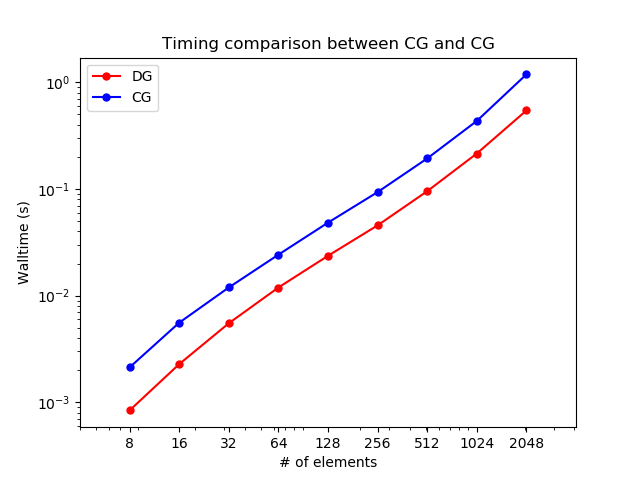

In [9]:
figure(1)
clf()

# Retrieve element values - level 3 in the Multiindex
Nv = df.index.levels[4].values

# Retrieve time values 
time_dg = df.loc[idx['advection','WPA','w/lim',2,:],'walltime'].values
time_cg = df.loc[idx['advection','WPA','wout/lim',2,:],'walltime'].values

loglog(Nv,time_cg,'r.-',markersize=10,label='DG')
loglog(Nv,time_dg,'b.-',markersize=10,label='CG')

set_xticks(Nv)

title('Timing comparison between CG and CG')
xlabel('# of elements')
ylabel('Walltime (s)')

legend()